In [1]:
## Importing Libraries
!pip install scikit-learn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
##Step 2. Importing Data
df = pd.read_pickle('/Users/javieraquezada/Desktop/Retail Analysis/02 Data/cleaned_sample.pkl')


In [3]:
# Keeping only the numeric columns to be  clustered on
numeric_cols = ['Age',               # customer demographics
                'Total_Purchases',   # buying frequency
                'Total_Amount',      # monetary value
                'Ratings']           # satisfaction proxy


In [12]:
scaled_data = df[numeric_cols].copy()

In [5]:
##Dropping categoricals (Gender, Country, etc.) because k-means only works on numbers. 
##The four variables above capture recency–frequency–monetary style behaviour plus satisfaction.


In [15]:
## Data Standarization
scaler = StandardScaler()
X = scaler.fit_transform(scaled_data)

In [16]:
## Standardization  will remove the influence of differing units (dollars vs. counts) for example.

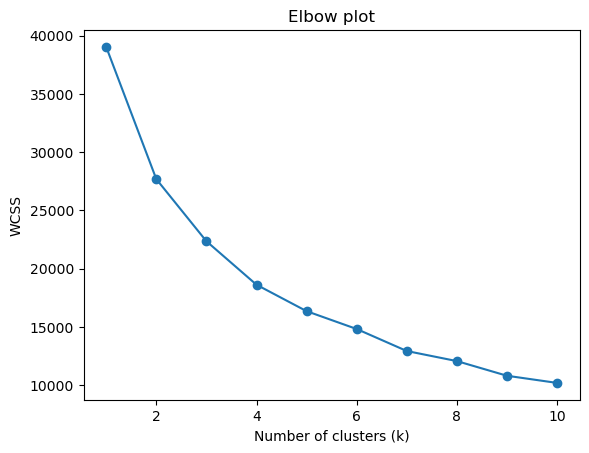

In [17]:
#Step 3. Elbow technique

wcss = []               # within-cluster sum of squares
k_range = range(1, 11)  # try 1..10 clusters

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow plot')
plt.show()

In [18]:
## Step.4 Making an Informed decision.
#I looked at how much the WCSS (error) drops as we add more clusters. There’s a big drop from 1 to 4 clusters. 
#After 4, the drops get smaller, meaning adding more clusters doesn’t improve things that much.
#So, it makes sense to go with 4 clusters.
#That’s where the “elbow” is in the chart — the point where it starts flattening out.

#We’ll continue with 4 clusters for the next step.

In [19]:
## Step 5. Running K-Means Algorithm

# Applying k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)  #(standardized numeric dataset)


KMeans(n_clusters=4, random_state=42)

In [20]:
# Step. 6. Adding the cluster labels to your original dataframe
df['Cluster'] = kmeans.labels_

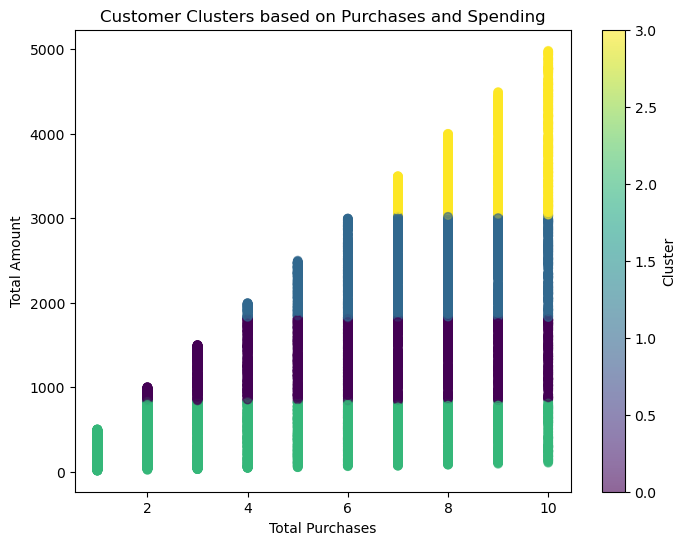

In [28]:
# Step 7.visualizing clusters
# Customer clusters purchase and spending

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Total_Purchases'], df['Total_Amount'], c=df['Cluster'], cmap='viridis', alpha=0.6)

plt.title('Customer Clusters based on Purchases and Spending')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.colorbar(scatter, label='Cluster')
plt.show()

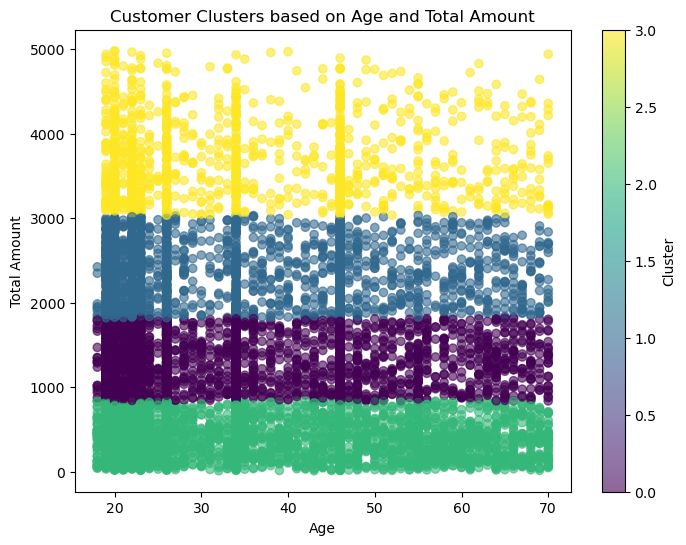

In [26]:
# Age vs Total amount
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Age'], df['Total_Amount'], c=df['Cluster'], cmap='viridis', alpha=0.6)

plt.title('Customer Clusters based on Age and Total Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.colorbar(scatter, label='Cluster')
plt.show()

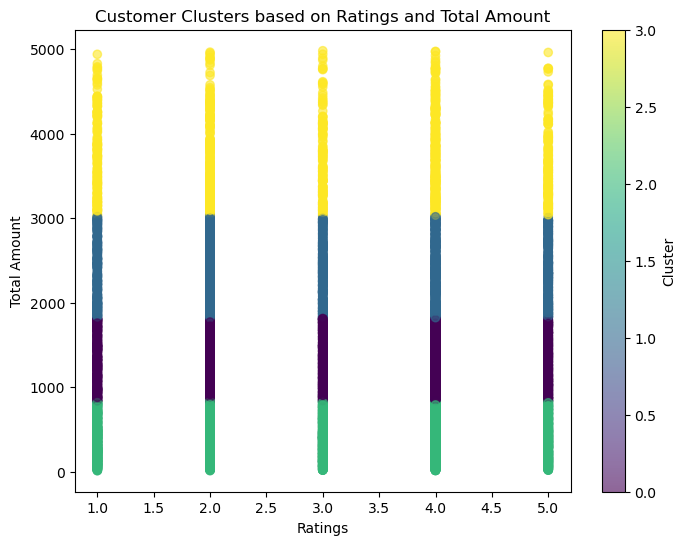

In [27]:
#Rating Vs total Amount
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Ratings'], df['Total_Amount'], c=df['Cluster'], cmap='viridis', alpha=0.6)

plt.title('Customer Clusters based on Ratings and Total Amount')
plt.xlabel('Ratings')
plt.ylabel('Total Amount')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [33]:
## Saving Viz
import matplotlib.pyplot as plt
import seaborn as sns
import os  


save_path = '/Users/javieraquezada/Desktop/'

# 1 Total_Purchases vs Total_Amount
plt.figure(figsize=(8,6))
plt.scatter(df['Total_Purchases'], df['Total_Amount'], c=df['Cluster'],
            cmap='viridis', alpha=0.6)
plt.title('Total Purchases vs Total Amount by Cluster')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.colorbar(label='Cluster')
plt.savefig(os.path.join(save_path, 'Purchases_vs_Amount_by_Cluster.png'))
plt.close()

# 2  Age vs Total_Amount
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Total_Amount'], c=df['Cluster'],
            cmap='viridis', alpha=0.6)
plt.title('Age vs Total Amount by Cluster')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.colorbar(label='Cluster')
plt.savefig(os.path.join(save_path, 'Age_vs_Amount_by_Cluster.png'))
plt.close()

# 3  Age vs Total_Purchases
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Total_Purchases'], c=df['Cluster'],
            cmap='viridis', alpha=0.6)
plt.title('Age vs Total Purchases by Cluster')
plt.xlabel('Age')
plt.ylabel('Total Purchases')
plt.colorbar(label='Cluster')
plt.savefig(os.path.join(save_path, 'Age_vs_Purchases_by_Cluster.png'))
plt.close()

print("Plots saved to Desktop.")

Plots saved to Desktop.


In [35]:
### Step 8. Cluster Interpretation

#Based on the clustering results :

#Cluster 3 has the highest total purchases and amount spent, which suggests these could be our
##high-value customers. They are slightly older and may be worth targeting for loyalty programs or premium offers.

#Cluster 1 spends a good amount and buys frequently,possibly regular, active customers.
#Cluster 0 has moderate spending and purchases. They may be average-value customers, responsive to occasional promotions.
#Cluster 2 spends the least and buys the least. They could be new or disengaged users, needing re-engagement strategies.

###Interestingly, age and rating are relatively consistent across clusters, 
#so they don’t seem to strongly influence segmentation in this case.

In [30]:
# Step 9. Calculating descriptive statistics using group by
print(df.groupby('Cluster')[['Total_Purchases', 'Total_Amount', 'Age', 'Ratings']].mean())

         Total_Purchases  Total_Amount        Age   Ratings
Cluster                                                    
0               5.478550   1285.608269  35.283284  3.149778
1               7.199571   2358.793224  35.742489  3.189914
2               3.642909    393.360019  35.250544  3.160425
3               8.868821   3714.646097  36.022814  3.101711


In [39]:
# Descriptive statistics by cluster
cluster_stats = (
    df.groupby('Cluster')[['Total_Purchases', 'Total_Amount', 'Age', 'Ratings']]
      .agg(['count', 'mean', 'median', 'min', 'max', 'std'])
      .round(2)  # round for readability
)

display(cluster_stats) 

Total_Purchases                               Total_Amount           \
                  count  mean median  min   max   std        count     mean   
Cluster                                                                       
0                  2704  5.48    5.0  2.0  10.0  2.27         2704  1285.61   
1                  1864  7.20    7.0  4.0  10.0  1.74         1864  2358.79   
2                  4139  3.64    3.0  1.0  10.0  2.61         4139   393.36   
3                  1052  8.87    9.0  7.0  10.0  1.01         1052  3714.65   

                           ...    Age                    Ratings               \
          median      min  ... median   min   max    std   count  mean median   
Cluster                    ...                                                  
0        1261.84   837.22  ...   32.0  18.0  70.0  14.85    2704  3.15    3.0   
1        2343.67  1818.04  ...   33.0  18.0  70.0  15.11    1864  3.19    3.0   
2         381.36    11.00  ...   31.0  18.0  70.0  15.02    4139  3.16    3.0   
3        3608.84  3035.81  ...   33.0  19.0  70.0  15.14    1052  3.10    3.0   

                         
         min  max   std  
Cluster                  
0        1.0  5.0  1.32  
1        1.0  5.0  1.32  
2        1.0  5.0  1.33  
3        1.0  5.0  1.33  

[4 rows x 24 columns]

In [36]:
### Step 10. Proposing what these results coud be useful for - Future Use Cases- of analytics papeline.

#Marketing segmentation: These clusters can guide how we target users 
#premium offers to high-value clusters, reactivation campaigns for low-engagement ones.
#Personalized product recommendations based on cluster behavior.
#Customer retention: Design strategies to prevent users from falling into low-spending clusters.
#Product analysis: Cross-check cluster behavior with favorite product categories or brands.